In [14]:

from collections import defaultdict, Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
turn_cols = ['user_turn_1_eot_user_creatures_in_play', 'user_turn_1_eot_oppo_creatures_in_play', 'user_turn_1_eot_user_non_creatures_in_play', 'user_turn_1_eot_oppo_non_creatures_in_play', 'oppo_turn_1_eot_user_creatures_in_play', 'oppo_turn_1_eot_oppo_creatures_in_play', 'oppo_turn_1_eot_user_non_creatures_in_play', 'oppo_turn_1_eot_oppo_non_creatures_in_play', 'user_turn_2_eot_user_creatures_in_play', 'user_turn_2_eot_oppo_creatures_in_play', 'user_turn_2_eot_user_non_creatures_in_play', 'user_turn_2_eot_oppo_non_creatures_in_play', 'oppo_turn_2_eot_user_creatures_in_play', 'oppo_turn_2_eot_oppo_creatures_in_play', 'oppo_turn_2_eot_user_non_creatures_in_play', 'oppo_turn_2_eot_oppo_non_creatures_in_play', 'user_turn_3_eot_user_creatures_in_play', 'user_turn_3_eot_oppo_creatures_in_play', 'user_turn_3_eot_user_non_creatures_in_play', 'user_turn_3_eot_oppo_non_creatures_in_play', 'oppo_turn_3_eot_user_creatures_in_play', 'oppo_turn_3_eot_oppo_creatures_in_play', 'oppo_turn_3_eot_user_non_creatures_in_play', 'oppo_turn_3_eot_oppo_non_creatures_in_play', 'user_turn_4_eot_user_creatures_in_play', 'user_turn_4_eot_oppo_creatures_in_play', 'user_turn_4_eot_user_non_creatures_in_play', 'user_turn_4_eot_oppo_non_creatures_in_play', 'oppo_turn_4_eot_user_creatures_in_play', 'oppo_turn_4_eot_oppo_creatures_in_play', 'oppo_turn_4_eot_user_non_creatures_in_play', 'oppo_turn_4_eot_oppo_non_creatures_in_play', 'user_turn_5_eot_user_creatures_in_play', 'user_turn_5_eot_oppo_creatures_in_play', 'user_turn_5_eot_user_non_creatures_in_play', 'user_turn_5_eot_oppo_non_creatures_in_play', 'oppo_turn_5_eot_user_creatures_in_play', 'oppo_turn_5_eot_oppo_creatures_in_play', 'oppo_turn_5_eot_user_non_creatures_in_play', 'oppo_turn_5_eot_oppo_non_creatures_in_play', 'user_turn_6_eot_user_creatures_in_play', 'user_turn_6_eot_oppo_creatures_in_play', 'user_turn_6_eot_user_non_creatures_in_play', 'user_turn_6_eot_oppo_non_creatures_in_play', 'oppo_turn_6_eot_user_creatures_in_play', 'oppo_turn_6_eot_oppo_creatures_in_play', 'oppo_turn_6_eot_user_non_creatures_in_play', 'oppo_turn_6_eot_oppo_non_creatures_in_play', 'user_turn_7_eot_user_creatures_in_play', 'user_turn_7_eot_oppo_creatures_in_play', 'user_turn_7_eot_user_non_creatures_in_play', 'user_turn_7_eot_oppo_non_creatures_in_play', 'oppo_turn_7_eot_user_creatures_in_play', 'oppo_turn_7_eot_oppo_creatures_in_play', 'oppo_turn_7_eot_user_non_creatures_in_play', 'oppo_turn_7_eot_oppo_non_creatures_in_play', 'user_turn_8_eot_user_creatures_in_play', 'user_turn_8_eot_oppo_creatures_in_play', 'user_turn_8_eot_user_non_creatures_in_play', 'user_turn_8_eot_oppo_non_creatures_in_play', 'oppo_turn_8_eot_user_creatures_in_play', 'oppo_turn_8_eot_oppo_creatures_in_play', 'oppo_turn_8_eot_user_non_creatures_in_play', 'oppo_turn_8_eot_oppo_non_creatures_in_play', 'user_turn_9_eot_user_creatures_in_play', 'user_turn_9_eot_oppo_creatures_in_play', 'user_turn_9_eot_user_non_creatures_in_play', 'user_turn_9_eot_oppo_non_creatures_in_play', 'oppo_turn_9_eot_user_creatures_in_play', 'oppo_turn_9_eot_oppo_creatures_in_play', 'oppo_turn_9_eot_user_non_creatures_in_play', 'oppo_turn_9_eot_oppo_non_creatures_in_play', 'user_turn_10_eot_user_creatures_in_play', 'user_turn_10_eot_oppo_creatures_in_play', 'user_turn_10_eot_user_non_creatures_in_play', 'user_turn_10_eot_oppo_non_creatures_in_play', 'oppo_turn_10_eot_user_creatures_in_play', 'oppo_turn_10_eot_oppo_creatures_in_play', 'oppo_turn_10_eot_user_non_creatures_in_play', 'oppo_turn_10_eot_oppo_non_creatures_in_play', 'user_turn_11_eot_user_creatures_in_play', 'user_turn_11_eot_oppo_creatures_in_play', 'user_turn_11_eot_user_non_creatures_in_play', 'user_turn_11_eot_oppo_non_creatures_in_play', 'oppo_turn_11_eot_user_creatures_in_play', 'oppo_turn_11_eot_oppo_creatures_in_play', 'oppo_turn_11_eot_user_non_creatures_in_play', 'oppo_turn_11_eot_oppo_non_creatures_in_play', 'user_turn_12_eot_user_creatures_in_play', 'user_turn_12_eot_oppo_creatures_in_play', 'user_turn_12_eot_user_non_creatures_in_play', 'user_turn_12_eot_oppo_non_creatures_in_play', 'oppo_turn_12_eot_user_creatures_in_play', 'oppo_turn_12_eot_oppo_creatures_in_play', 'oppo_turn_12_eot_user_non_creatures_in_play', 'oppo_turn_12_eot_oppo_non_creatures_in_play', 'user_turn_13_eot_user_creatures_in_play', 'user_turn_13_eot_oppo_creatures_in_play', 'user_turn_13_eot_user_non_creatures_in_play', 'user_turn_13_eot_oppo_non_creatures_in_play', 'oppo_turn_13_eot_user_creatures_in_play', 'oppo_turn_13_eot_oppo_creatures_in_play', 'oppo_turn_13_eot_user_non_creatures_in_play', 'oppo_turn_13_eot_oppo_non_creatures_in_play', 'user_turn_14_eot_user_creatures_in_play', 'user_turn_14_eot_oppo_creatures_in_play', 'user_turn_14_eot_user_non_creatures_in_play', 'user_turn_14_eot_oppo_non_creatures_in_play', 'oppo_turn_14_eot_user_creatures_in_play', 'oppo_turn_14_eot_oppo_creatures_in_play', 'oppo_turn_14_eot_user_non_creatures_in_play', 'oppo_turn_14_eot_oppo_non_creatures_in_play', 'user_turn_15_eot_user_creatures_in_play', 'user_turn_15_eot_oppo_creatures_in_play', 'user_turn_15_eot_user_non_creatures_in_play', 'user_turn_15_eot_oppo_non_creatures_in_play', 'oppo_turn_15_eot_user_creatures_in_play', 'oppo_turn_15_eot_oppo_creatures_in_play', 'oppo_turn_15_eot_user_non_creatures_in_play', 'oppo_turn_15_eot_oppo_non_creatures_in_play', 'user_turn_16_eot_user_creatures_in_play', 'user_turn_16_eot_oppo_creatures_in_play', 'user_turn_16_eot_user_non_creatures_in_play', 'user_turn_16_eot_oppo_non_creatures_in_play', 'oppo_turn_16_eot_user_creatures_in_play', 'oppo_turn_16_eot_oppo_creatures_in_play', 'oppo_turn_16_eot_user_non_creatures_in_play', 'oppo_turn_16_eot_oppo_non_creatures_in_play', 'user_turn_17_eot_user_creatures_in_play', 'user_turn_17_eot_oppo_creatures_in_play', 'user_turn_17_eot_user_non_creatures_in_play', 'user_turn_17_eot_oppo_non_creatures_in_play', 'oppo_turn_17_eot_user_creatures_in_play', 'oppo_turn_17_eot_oppo_creatures_in_play', 'oppo_turn_17_eot_user_non_creatures_in_play', 'oppo_turn_17_eot_oppo_non_creatures_in_play', 'user_turn_18_eot_user_creatures_in_play', 'user_turn_18_eot_oppo_creatures_in_play', 'user_turn_18_eot_user_non_creatures_in_play', 'user_turn_18_eot_oppo_non_creatures_in_play', 'oppo_turn_18_eot_user_creatures_in_play', 'oppo_turn_18_eot_oppo_creatures_in_play', 'oppo_turn_18_eot_user_non_creatures_in_play', 'oppo_turn_18_eot_oppo_non_creatures_in_play', 'user_turn_19_eot_user_creatures_in_play', 'user_turn_19_eot_oppo_creatures_in_play', 'user_turn_19_eot_user_non_creatures_in_play', 'user_turn_19_eot_oppo_non_creatures_in_play', 'oppo_turn_19_eot_user_creatures_in_play', 'oppo_turn_19_eot_oppo_creatures_in_play', 'oppo_turn_19_eot_user_non_creatures_in_play', 'oppo_turn_19_eot_oppo_non_creatures_in_play', 'user_turn_20_eot_user_creatures_in_play', 'user_turn_20_eot_oppo_creatures_in_play', 'user_turn_20_eot_user_non_creatures_in_play', 'user_turn_20_eot_oppo_non_creatures_in_play', 'oppo_turn_20_eot_user_creatures_in_play', 'oppo_turn_20_eot_oppo_creatures_in_play', 'oppo_turn_20_eot_user_non_creatures_in_play', 'oppo_turn_20_eot_oppo_non_creatures_in_play', 'user_turn_21_eot_user_creatures_in_play', 'user_turn_21_eot_oppo_creatures_in_play', 'user_turn_21_eot_user_non_creatures_in_play', 'user_turn_21_eot_oppo_non_creatures_in_play', 'oppo_turn_21_eot_user_creatures_in_play', 'oppo_turn_21_eot_oppo_creatures_in_play', 'oppo_turn_21_eot_user_non_creatures_in_play', 'oppo_turn_21_eot_oppo_non_creatures_in_play', 'user_turn_22_eot_user_creatures_in_play', 'user_turn_22_eot_oppo_creatures_in_play', 'user_turn_22_eot_user_non_creatures_in_play', 'user_turn_22_eot_oppo_non_creatures_in_play', 'oppo_turn_22_eot_user_creatures_in_play', 'oppo_turn_22_eot_oppo_creatures_in_play', 'oppo_turn_22_eot_user_non_creatures_in_play', 'oppo_turn_22_eot_oppo_non_creatures_in_play', 'user_turn_23_eot_user_creatures_in_play', 'user_turn_23_eot_oppo_creatures_in_play', 'user_turn_23_eot_user_non_creatures_in_play', 'user_turn_23_eot_oppo_non_creatures_in_play', 'oppo_turn_23_eot_user_creatures_in_play', 'oppo_turn_23_eot_oppo_creatures_in_play', 'oppo_turn_23_eot_user_non_creatures_in_play', 'oppo_turn_23_eot_oppo_non_creatures_in_play', 'user_turn_24_eot_user_creatures_in_play', 'user_turn_24_eot_oppo_creatures_in_play', 'user_turn_24_eot_user_non_creatures_in_play', 'user_turn_24_eot_oppo_non_creatures_in_play', 'oppo_turn_24_eot_user_creatures_in_play', 'oppo_turn_24_eot_oppo_creatures_in_play', 'oppo_turn_24_eot_user_non_creatures_in_play', 'oppo_turn_24_eot_oppo_non_creatures_in_play', 'user_turn_25_eot_user_creatures_in_play', 'user_turn_25_eot_oppo_creatures_in_play', 'user_turn_25_eot_user_non_creatures_in_play', 'user_turn_25_eot_oppo_non_creatures_in_play', 'oppo_turn_25_eot_user_creatures_in_play', 'oppo_turn_25_eot_oppo_creatures_in_play', 'oppo_turn_25_eot_user_non_creatures_in_play', 'oppo_turn_25_eot_oppo_non_creatures_in_play', 'user_turn_26_eot_user_creatures_in_play', 'user_turn_26_eot_oppo_creatures_in_play', 'user_turn_26_eot_user_non_creatures_in_play', 'user_turn_26_eot_oppo_non_creatures_in_play', 'oppo_turn_26_eot_user_creatures_in_play', 'oppo_turn_26_eot_oppo_creatures_in_play', 'oppo_turn_26_eot_user_non_creatures_in_play', 'oppo_turn_26_eot_oppo_non_creatures_in_play', 'user_turn_27_eot_user_creatures_in_play', 'user_turn_27_eot_oppo_creatures_in_play', 'user_turn_27_eot_user_non_creatures_in_play', 'user_turn_27_eot_oppo_non_creatures_in_play', 'oppo_turn_27_eot_user_creatures_in_play', 'oppo_turn_27_eot_oppo_creatures_in_play', 'oppo_turn_27_eot_user_non_creatures_in_play', 'oppo_turn_27_eot_oppo_non_creatures_in_play', 'user_turn_28_eot_user_creatures_in_play', 'user_turn_28_eot_oppo_creatures_in_play', 'user_turn_28_eot_user_non_creatures_in_play', 'user_turn_28_eot_oppo_non_creatures_in_play', 'oppo_turn_28_eot_user_creatures_in_play', 'oppo_turn_28_eot_oppo_creatures_in_play', 'oppo_turn_28_eot_user_non_creatures_in_play', 'oppo_turn_28_eot_oppo_non_creatures_in_play', 'user_turn_29_eot_user_creatures_in_play', 'user_turn_29_eot_oppo_creatures_in_play', 'user_turn_29_eot_user_non_creatures_in_play', 'user_turn_29_eot_oppo_non_creatures_in_play', 'oppo_turn_29_eot_user_creatures_in_play', 'oppo_turn_29_eot_oppo_creatures_in_play', 'oppo_turn_29_eot_user_non_creatures_in_play', 'oppo_turn_29_eot_oppo_non_creatures_in_play', 'user_turn_30_eot_user_creatures_in_play', 'user_turn_30_eot_oppo_creatures_in_play', 'user_turn_30_eot_user_non_creatures_in_play', 'user_turn_30_eot_oppo_non_creatures_in_play', 'oppo_turn_30_eot_user_creatures_in_play', 'oppo_turn_30_eot_oppo_creatures_in_play', 'oppo_turn_30_eot_user_non_creatures_in_play', 'oppo_turn_30_eot_oppo_non_creatures_in_play']
data = pd.read_csv(r'..\data\replay_data\replay_data_public.DSK.PremierDraft.csv', usecols=['won'] + turn_cols, nrows = 1000)

# Load the cards data
data_cards = pd.read_csv('../data/cards_data/cards.csv')
card_name_map = dict(zip(data_cards['id'].astype(str), data_cards['name']))


C:\Users\Jack Wright\AppData\Local\Temp\ipykernel_18924\1385864420.py:2: DtypeWarning: Columns (116,117,146,147,923,985,1015,1044,1045,1047,1077,1106,1107,1108,1109,1136,1137,1139,1168,1169,1170,1171,1198,1199,1200,1201,1230,1231,1232,1233,1260,1261,1262,1263,1292,1293,1294,1295,1322,1323,1324,1325,1354,1355,1356,1357,1384,1385,1386,1387,1416,1417,1418,1446,1447,1448,1449,1478,1479,1480,1508,1509,1510,1540,1541,1542,1570,1571,1572,1632,1633,1634) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'..\data\replay_data\replay_data_public.DSK.PremierDraft.csv', usecols=['won'] + turn_cols, nrows = 1000)


In [3]:

# Initialize a dictionary to store card stats
card_stats = defaultdict(lambda: defaultdict(Counter))


In [7]:

# Inspect the columns to identify relevant ones
columns = data.columns
turn_columns = [col for col in columns if "turn" in col and "in_play" in col and 'land' not in col]
print(turn_columns)

['user_turn_1_eot_user_creatures_in_play', 'user_turn_1_eot_oppo_creatures_in_play', 'user_turn_1_eot_user_non_creatures_in_play', 'user_turn_1_eot_oppo_non_creatures_in_play', 'oppo_turn_1_eot_user_creatures_in_play', 'oppo_turn_1_eot_oppo_creatures_in_play', 'oppo_turn_1_eot_user_non_creatures_in_play', 'oppo_turn_1_eot_oppo_non_creatures_in_play', 'user_turn_2_eot_user_creatures_in_play', 'user_turn_2_eot_oppo_creatures_in_play', 'user_turn_2_eot_user_non_creatures_in_play', 'user_turn_2_eot_oppo_non_creatures_in_play', 'oppo_turn_2_eot_user_creatures_in_play', 'oppo_turn_2_eot_oppo_creatures_in_play', 'oppo_turn_2_eot_user_non_creatures_in_play', 'oppo_turn_2_eot_oppo_non_creatures_in_play', 'user_turn_3_eot_user_creatures_in_play', 'user_turn_3_eot_oppo_creatures_in_play', 'user_turn_3_eot_user_non_creatures_in_play', 'user_turn_3_eot_oppo_non_creatures_in_play', 'oppo_turn_3_eot_user_creatures_in_play', 'oppo_turn_3_eot_oppo_creatures_in_play', 'oppo_turn_3_eot_user_non_creatures

In [20]:
card_stats

defaultdict(<function __main__.<lambda>()>,
            {'92181': defaultdict(collections.Counter,
                         {2: Counter({True: 56, False: 56}),
                          3: Counter({False: 88, True: 88}),
                          7: Counter({False: 72, True: 30}),
                          8: Counter({False: 60, True: 44}),
                          9: Counter({True: 54, False: 50}),
                          5: Counter({False: 88, True: 72}),
                          10: Counter({True: 38, False: 32}),
                          11: Counter({True: 30, False: 12}),
                          12: Counter({False: 8, True: 4}),
                          13: Counter({False: 12}),
                          14: Counter({False: 14}),
                          4: Counter({False: 88, True: 80}),
                          6: Counter({False: 80, True: 42}),
                          15: Counter({False: 10}),
                          16: Counter({False: 8}),
                      

In [18]:
import pandas as pd
import numpy as np

# Ensure there is a 'won' column
if 'won' not in data.columns:
    raise ValueError("The dataset must have a 'won' column indicating True or False.")

# Convert all 'nan' strings to np.nan
data = data.replace('nan', np.nan, regex=False)

# Iterate through each row of the dataset
for _, row in data.iterrows():
    for col in turn_columns:
        turn = int(col.split('_')[2])  # Extract turn number from column name
        
        # Skip the column if it contains NaN
        if pd.isna(row[col]):
            continue
        
        # Get card IDs as a list
        cards = str(row[col]).split('|')  # Split non-NaN values
        
        # Print the results for debugging
        regex = r'(?<=eot_)[^_]+'
        card_owner = re.search(regex, col).group(0)
        if card_owner == 'oppo':
            #invert 'won' value (true or false)
            won = not row['won']
        else:
            won = row['won']
        for card in cards:
            if card:  # Ignore empty values
                card_stats[card][turn][won] += 1

# Example function to calculate win rates
def calculate_win_rate(card_stats, baseline=100):
    win_rates = {}
    for card, turns in card_stats.items():
        win_rates[card] = {}
        for turn, won in turns.items():
            total = won['True'] + won['False']
            if total >= baseline:  # Filter out low sample sizes
                win_rates[card][turn] = won['True'] / total
            else:
                win_rates[card][turn] = None
    return win_rates
            

# Calculate win rates with a baseline count filter
win_rates = calculate_win_rate(card_stats, baseline=5)

# Create a DataFrame for card statistics
card_stats_list = []
for card, turns in win_rates.items():
    for turn, win_rate in turns.items():
        if win_rate is not None:  # Only include turns with valid win rates
            card_name = card_name_map.get(card, "Unknown")
            card_stats_list.append({
                'Card ID': card,
                'Card Name': card_name,
                'Turn': turn,
                'Win Rate': win_rate
            })

card_stats_df = pd.DataFrame(card_stats_list)

In [19]:
card_stats_df

""


In [5]:

# Iterate through each row of the dataset
for _, row in data.iterrows():
    outcome = 'won' if row['won'] else 'lost'  # Map True/False to 'won'/'lost'
    
    for col in turn_columns:
        turn = int(col.split('_')[2])  # Extract turn number from column name
        cards = str(row[col]).split('|')  # Get card IDs as a list

        for card in cards:
            if card:  # Ignore empty values
                card_stats[card][turn][outcome] += 1


def calculate_win_rate(card_stats, baseline=100):
    """
    takes in a dictionary of card stats and calculates the win rate for each card and turn"""
    win_rates = {}
    for card, turns in card_stats.items():
        win_rates[card] = {}
        for turn, outcomes in turns.items():
            total = outcomes['won'] + outcomes['lost']
            if total >= baseline:  # Filter out low sample sizes
                win_rates[card][turn] = outcomes['won'] / total
            else:
                win_rates[card][turn] = None
    return win_rates

# Calculate win rates with a baseline count filter
win_rates = calculate_win_rate(card_stats, baseline=5)

# Create a DataFrame for card statistics
card_stats_list = []
for card, turns in win_rates.items():
    for turn, win_rate in turns.items():
        if win_rate is not None:  # Only include turns with valid win rates
            card_name = card_name_map.get(card, "Unknown")
            card_stats_list.append({
                'Card ID': card,
                'Card Name': card_name,
                'Turn': turn,
                'Win Rate': win_rate
            })

card_stats_df = pd.DataFrame(card_stats_list)



In [6]:
specific_card = str(data[turn_columns].stack().dropna().str.split('|').explode().sample(1).iloc[0])
win_rates[specific_card]

KeyboardInterrupt: 

In [7]:
dsk_cards = card_stats_df[card_stats_df['Card ID']!= 'nan']
dsk_cards


,Card ID,Card Name,Turn,Win Rate
30,92181,Innocuous Rat,2,0.542954
31,92181,Innocuous Rat,3,0.543211
32,92181,Innocuous Rat,7,0.540955
33,92181,Innocuous Rat,8,0.537241
34,92181,Innocuous Rat,9,0.536780
...,...,...,...,...
14581,74154,Swamp,8,0.727273
14582,74154,Swamp,9,0.777778
14583,74154,Swamp,4,1.000000
14584,74156,Swamp,6,1.000000


In [8]:
# save dsk_cards to csv
dsk_cards.to_csv('../data/winrates_by_turn/dsk_winrates_by_turn.csv', index=False)

In [28]:
dsk_cards.columns

Index(['Card ID', 'Card Name', 'Turn', 'Win Rate'], dtype='object')

In [34]:
# Step 1: Get unique values from the 'Card ID' column
unique_card_names = dsk_cards['Card Name'].unique()


array(['Innocuous Rat', 'Piggy Bank', 'Wildfire Wickerfolk',
       'Fear of Being Hunted', 'Undead Sprinter',
       "Painter's Studio // Defaced Gallery", 'Irreverent Gremlin',
       'Clockwork Percussionist', 'Glassworks // Shattered Yard',
       'Paranormal Analyst', 'Mountain', '[Face-Down Card]',
       'Ghost Vacuum', 'Wickerfolk Thresher',
       'Meat Locker // Drowned Diner', 'Boilerbilges Ripper',
       'Conductive Machete', 'Infernal Phantom',
       'Nashi, Searcher in the Dark', 'Patchwork Beastie',
       'Fear of Burning Alive', 'Fear of Falling',
       'Stay Hidden, Stay Silent', 'Daggermaw Megalodon',
       'Unable to Scream', "Derelict Attic // Widow's Walk",
       'Vicious Clown', 'Silent Hallcreeper', 'Sawblade Skinripper',
       'Ticket Booth // Tunnel of Hate', 'Chainsaw',
       'Roaring Furnace // Steaming Sauna', 'Razorkin Hordecaller',
       'Gremlin', "Duskmourn's Domination", 'Creeping Peeper',
       'Ragged Playmate', 'Flesh Burrower', 'Glimmer Se

In [77]:
avg_win_rate = dsk_cards.groupby('Turn').agg({'Win Rate': 'mean'})
avg_win_rate

,Win Rate
Turn,
1,0.603945
2,0.570492
3,0.576435
4,0.588451
5,0.592703
6,0.592916
7,0.590233
8,0.582836
9,0.580802


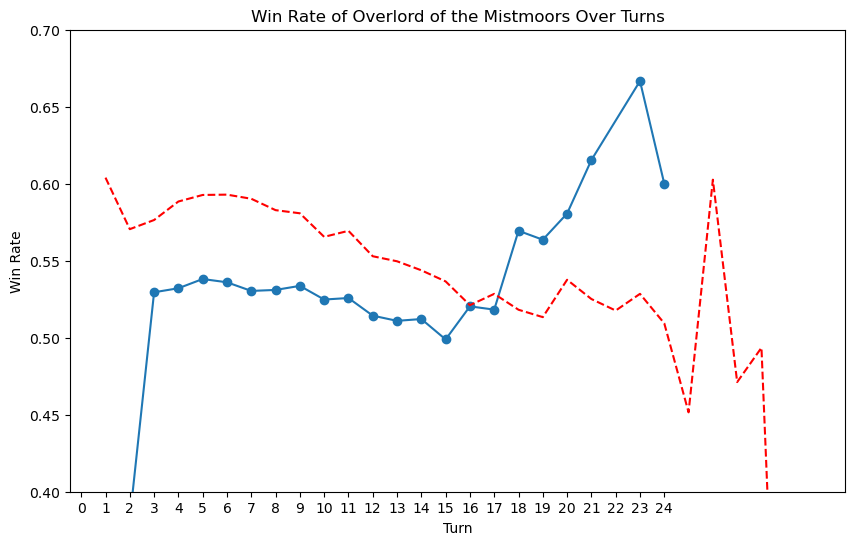

In [111]:

# Step 2: Pick a random value from the unique IDs
random_card_name = np.random.choice(unique_card_names)
card_df = dsk_cards[dsk_cards['Card Name'] == random_card_name].copy()

card_df['Turn'] = card_df['Turn'].astype(int)

card_df.sort_values('Turn', inplace=True)
card_df

plt.figure(figsize=(10, 6))
plt.plot(card_df['Turn'], card_df['Win Rate'], marker='o')
# put xticks on  whole numbers
plt.xticks(np.arange(0, max(card_df['Turn'])+1, 1))
plt.xlabel('Turn')
plt.ylabel('Win Rate')
plt.ylim(.4, .7)
plt.title(f'Win Rate of {card_df['Card Name'].iloc[0]} Over Turns')
plt.plot(avg_win_rate, color='red', linestyle='dashed')
plt.show()

In [ ]:
card_df